**Table of Contents** <br>
* [1. Import libraries and datasets](#import)

* [2. Initial Exploration](#initialexploration)

* [3. Coherence Checking](#Coherence)

* [4. Split data](#Split)

* [5. Outliers Treatment](#outliers)
    * [5.1. Automatic Limitation](#AutomaticLimitation)
    * [5.2. IQR](#IQR)
    * [5.3. 2-dimensional outliers](#2dim_outliers)

* [6. Missing values Treatment](#missings)

* [7. Scale the data](#scale)

* [8. Feature Engeneering](#FeatureEngeneering)

* [9. Feature Selection](#FeatureSelection)
    * [9.1. Filter Methods](#filter)
    * [9.2. Wrapper Methods](#wrapper)
    * [9.3. Embedded Methods](#embedded)
    

* [10. Check for an imbalanced dataset](#imbalanced)

<hr>
<a class="anchor" id="import">
    
# 1. Import libraries and datasets
    
</a>

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import scipy.stats as stats
import datetime as dt

In [235]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<hr>
<a class="anchor" id="initialexploration">
    
# 2. Initial Exploration
    
</a>

In [236]:
df.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [237]:
df.describe()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.519728e+08,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216
std,2.024990e+08,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128
min,1.028633e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.731950e+08,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000
50%,4.536169e+08,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000
75%,6.259756e+08,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000
max,7.984440e+08,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [239]:
df.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [240]:
techScapeReport = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#techScapeReport.to_notebook_iframe()

## Data Preparation

### Access_ID

<b>Unique identification of the user access to the website
* The Access_ID variable is 100% distinct across all records, hence we can use it as an index.

In [241]:
df = df.set_index(["Access_ID"])

### Date

<b>Website visit date

* For practicality it was decided to convert the date variable to a datetime object

In [242]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%b-%y")

In [243]:
# Checking datatypes
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    object
Browser                                int64
Country                               object
Type_of_Traffic                        int64
Type_of_Visitor                       object
Buy                                    int64
dtype: object

In [244]:
df['AccountMng_Pages']=df['AccountMng_Pages'].astype(pd.Int32Dtype())
df['AccountMng_Duration']=df['AccountMng_Duration'].astype(pd.Float32Dtype())

df['FAQ_Pages']=df['FAQ_Pages'].astype(pd.Int32Dtype())
df['FAQ_Duration']=df['FAQ_Duration'].astype(pd.Float32Dtype())
df['Product_Pages']=df['Product_Pages'].astype(pd.Int32Dtype())
df['Product_Duration']=df['Product_Duration'].astype(pd.Float32Dtype())
df['GoogleAnalytics_BounceRate']=df['GoogleAnalytics_BounceRate'].astype(pd.Float32Dtype())
df['GoogleAnalytics_ExitRate']=df['GoogleAnalytics_ExitRate'].astype(pd.Float32Dtype())
df['GoogleAnalytics_PageValue']=df['GoogleAnalytics_PageValue'].astype(pd.Float32Dtype())
df['OS']=df['OS'].astype(pd.StringDtype())
df['Browser']=df['Browser'].astype(pd.Int32Dtype())
df['Country']=df['Country'].astype(pd.StringDtype())
df['Type_of_Traffic']=df['Type_of_Traffic'].astype(pd.Int32Dtype())
df['Type_of_Visitor']=df['Type_of_Visitor'].astype(pd.StringDtype())
df['Buy']=df['Buy'].astype(pd.Int32Dtype())


In [245]:
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       Int32
AccountMng_Duration                  Float32
FAQ_Pages                              Int32
FAQ_Duration                         Float32
Product_Pages                          Int32
Product_Duration                     Float32
GoogleAnalytics_BounceRate           Float32
GoogleAnalytics_ExitRate             Float32
GoogleAnalytics_PageValue            Float32
OS                                    string
Browser                                Int32
Country                               string
Type_of_Traffic                        Int32
Type_of_Visitor                       string
Buy                                    Int32
dtype: object

<hr>
<a class="anchor" id="Coherence">
    
# 3. Coherence Checking
    
</a>

In [246]:
# confirming that the first and last day of every month is correct
df['day']=df['Date'].dt.day
df.groupby(df['Date'].dt.month).agg(['min', 'max'])['day']

,min,max
Date,,
2,1,29
3,1,31
5,1,31
6,1,30
7,1,31
8,1,31
9,1,30
10,1,31
11,1,30


In [247]:
df[(df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0)]
df[(df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0)] 
#df[(df['FAQ_Pages']>0) & (df['FAQ_Duration']==0)]#176
#df[(df['FAQ_Pages']==0) & (df['FAQ_Duration']>0)]
#df[(df['Product_Pages']==0) & (df['Product_Pages']>0)]
#df[(df['Product_Pages']>0) & (df['Product_Pages']==0)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
104650368,2020-11-05,1,0.0,0,0.0,14,1125.875,0.0,0.0429,0.0,Windows,2,Portugal,2,Returner,0,5
107375098,2020-08-07,1,0.0,3,69.0,15,352.875,0.0,0.0556,0.0,Windows,2,Spain,2,Returner,0,7
113677580,2020-11-28,1,0.0,0,0.0,39,1159.541748,0.0013,0.0313,0.0,Windows,2,Other,2,Returner,1,28
115628954,2020-05-23,2,0.0,0,0.0,0,0.0,0.2,0.2,0.0,Android,2,Portugal,6,Returner,0,23
116343256,2020-10-11,1,0.0,1,66.400002,14,668.316711,0.0143,0.0286,44.893501,iOS,2,Portugal,15,Returner,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776479996,2020-06-26,1,0.0,0,0.0,12,277.450012,0.06,0.09,0.0,MacOSX,2,Spain,13,Returner,0,26
776570163,2020-05-25,1,0.0,0,0.0,27,889.0,0.0214,0.0679,0.0,iOS,1,Spain,3,Returner,0,25
778884123,2020-05-26,1,0.0,0,0.0,90,5621.599121,0.0,0.0131,2.099,Windows,2,Italy,2,Returner,0,26


In [248]:
df=df[~(
    
        ((df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0))|
        ((df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0))|
        ((df['FAQ_Pages']>0) & (df['FAQ_Duration']==0))|
        ((df['FAQ_Pages']==0) & (df['FAQ_Duration']>0))|
        ((df['Product_Pages']==0) & (df['Product_Pages']>0))|
        ((df['Product_Pages']>0) & (df['Product_Pages']==0))|
        (df['GoogleAnalytics_BounceRate']>1)|
    (df['GoogleAnalytics_BounceRate']<0)|
    
    (df['GoogleAnalytics_ExitRate']>1)|
    (df['GoogleAnalytics_ExitRate']<0)|
    (df['GoogleAnalytics_BounceRate']>1)|
    (df['GoogleAnalytics_BounceRate']<0)|
    (df['Date']>dt.datetime(2020,12,31))|
    (df['Date']<dt.datetime(2020,1,31))
    
        )]

In [249]:
import datetime as dt
df[df['Date']>dt.datetime(2020,1,31)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.025,0.0583,0.0,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.75,0.0,0.025,42.422501,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.939697,0.0,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.125,0.0,0.0111,0.0,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.100006,0,0.0,3,27.6,0.0,0.0111,0.0,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0,0.0077,0.0519,0.0,MacOSX,2,France,3,Returner,0,23


In [250]:
# percentage of records removed due to inconsistency
289/9999

0.028902890289028902

### Split data

In [251]:
X = df.drop("Buy", axis = 1)
y = df["Buy"]

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
X_train,X_val,y_train,y_val = train_test_split(X,y, stratify = y, train_size = 0.70,random_state = 0, shuffle = True)

### Separate Numerical from Categorical 

In [254]:
# X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
# X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
# #For validation
# X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
# X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [255]:
non_num_feat=['Date', 'OS', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 'day','Browser']
X_train_num = X_train.drop(columns=non_num_feat)
X_train_num
X_train_cat=X_train[non_num_feat]
X_train_cat

X_val_num = X_val.drop(columns=non_num_feat)
X_val_num
X_val_cat=X_val[non_num_feat]
X_val_cat

,Date,OS,Country,Type_of_Traffic,Type_of_Visitor,day,Browser
Access_ID,,,,,,,
609666640,2020-11-08,Windows,United Kingdom,8,New_Access,8,4
598178285,2020-03-10,MacOSX,Portugal,3,Returner,10,2
535781019,2020-11-29,Windows,Portugal,2,Returner,29,2
436628688,2020-03-22,Windows,Portugal,3,Returner,22,2
707978633,2020-11-24,Windows,Portugal,2,Returner,24,2
...,...,...,...,...,...,...,...
294996079,2020-11-18,Android,Portugal,2,New_Access,18,1
442079450,2020-03-05,iOS,Portugal,3,Returner,5,1
369120236,2020-05-28,Android,Italy,14,Returner,28,1


## Removing Outliers From Data

<b>Using drop_outliers to drop unwanted outliers from df </b>
* Having analysed the distrbution of this variable, it became apparent that there may be outliers.
* It was decided to drop the outliers and then later on reintroduce them if, as a result, the accuracy of the model suffered. Dropped 119 records (1.2%).

### Manual Filtering

Text(0.5, 0.98, "Numeric Variables' Histograms")

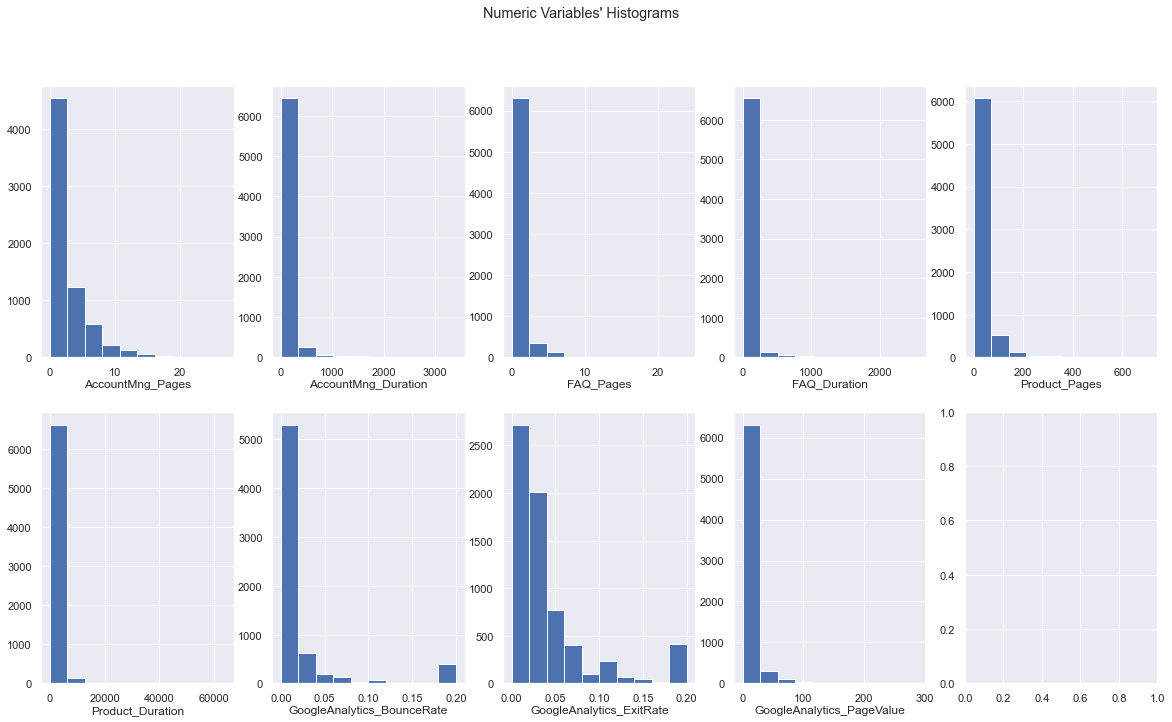

In [256]:
# All Numeric Variables' Histograms in one figure
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline


sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), (X_train_num.columns.tolist())): # Notice the zip() function and flatten() method
    ax.hist(X_train_num[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

#plt.savefig("teste.png")

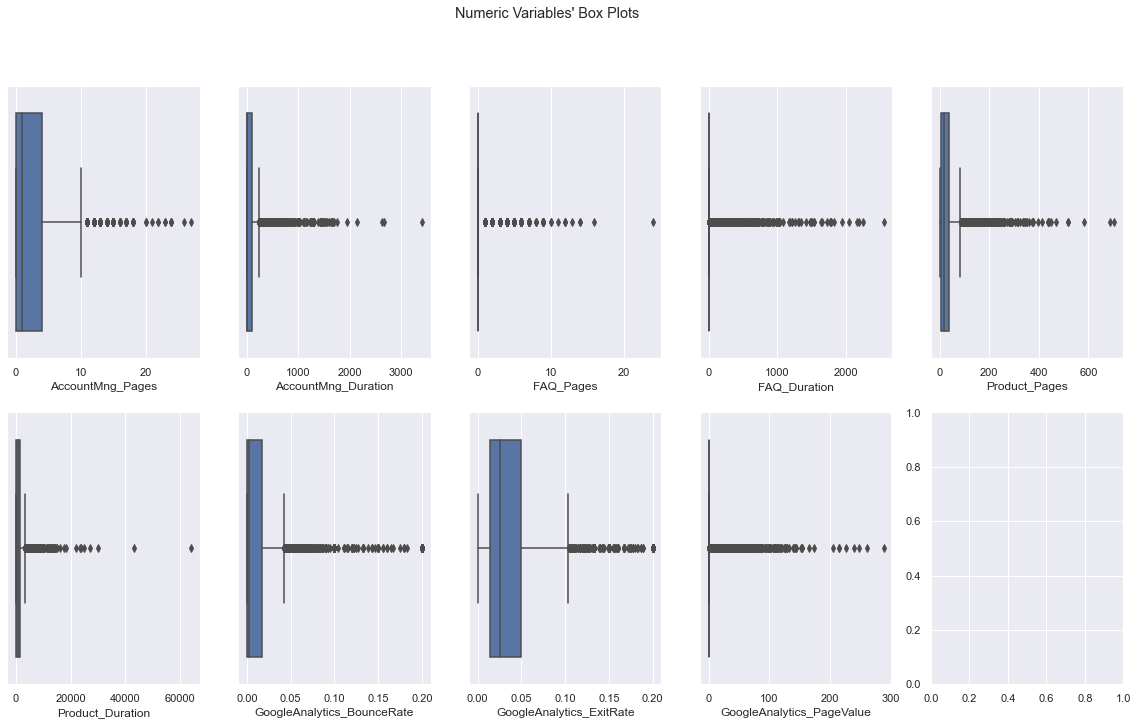

In [257]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_num.columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [258]:
(len(X_train)-6270 )/len(X_train)

0.07753420626747094

In [259]:
(6797-6270 )/6797 

0.07753420626747094

In [260]:
len(X_train)

6797

In [261]:
#def manual_filter(df):
def filter_outlier(df):
    filters1 = (
             (df['AccountMng_Pages']<=28)
             &
             (df['AccountMng_Duration']<=2500)
             &
             (df['FAQ_Pages']<=20)
             &
             (df['FAQ_Duration']<=2500)
             &
             (df['Product_Pages']<=600)
             &
             (df['Product_Duration']<=40000)
             &
             (df['GoogleAnalytics_BounceRate']<=0.19)
             &
             (df['GoogleAnalytics_ExitRate']<=0.19)
             &
             (df['GoogleAnalytics_PageValue']<=300)
             &
             (df['Browser']<=9)
             )
    return df[filters1],df[~filters1].index

In [262]:
index_out_train=filter_outlier(X_train)[1].tolist()

In [263]:
index_out_val=filter_outlier(X_val)[1].tolist()

In [264]:
X_val_no_out=filter_outlier(X_val)[0]

In [265]:
X_train_no_out=filter_outlier(X_train)[0]

In [266]:
X_train_no_out

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,day
Access_ID,,,,,,,,,,,,,,,,
746917175,2020-09-19,4,77.099998,0,0.0,4,41.700001,0.0,0.0286,0.0,Windows,2,Brazil,6,Returner,19
565616559,2020-12-16,0,0.0,4,8.0,66,1514.836304,0.0229,0.0449,0.0,Windows,2,Other,2,Returner,16
276412217,2020-12-30,7,131.833298,0,0.0,63,2074.611084,0.0108,0.02,0.0,MacOSX,2,Spain,10,Returner,30
361837847,2020-05-20,0,0.0,0,0.0,2,121.0,0.0,0.05,0.0,MacOSX,2,Portugal,3,Returner,20
568629484,2020-03-20,0,0.0,0,0.0,21,1003.0,0.0,0.0083,0.0,Windows,4,Portugal,1,Returner,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789752052,2020-07-02,5,109.599998,1,3.0,29,1980.266724,0.0061,0.0263,0.0,Windows,2,Portugal,4,Returner,2
581081929,2020-03-22,0,0.0,0,0.0,12,169.300003,0.0,0.0167,0.0,Windows,2,Spain,2,Returner,22
283517225,2020-12-25,5,97.0,0,0.0,53,3372.748291,0.0038,0.0025,0.0,Windows,2,Italy,2,Returner,25


In [299]:
y_train_df=pd.DataFrame(y_train)
y_train_df=y_train_df[~y_train_df.index.isin(index_out_train)]

In [295]:
y_val_df=pd.DataFrame(y_val)
y_val_df[~y_val_df.index.isin(index_out_val)]

,Buy
Access_ID,
609666640,1
598178285,0
535781019,1
436628688,0
707978633,1
...,...
294996079,0
442079450,0
369120236,0


In [296]:
X_train_no_out_num = X_train_no_out.drop(columns=non_num_feat)
X_train_no_out_cat=X_train_no_out[non_num_feat]

X_val_no_out_num = X_val_no_out.drop(columns=non_num_feat)
X_val_no_out_cat=X_val_no_out[non_num_feat]


### Multi-dimentional outliers

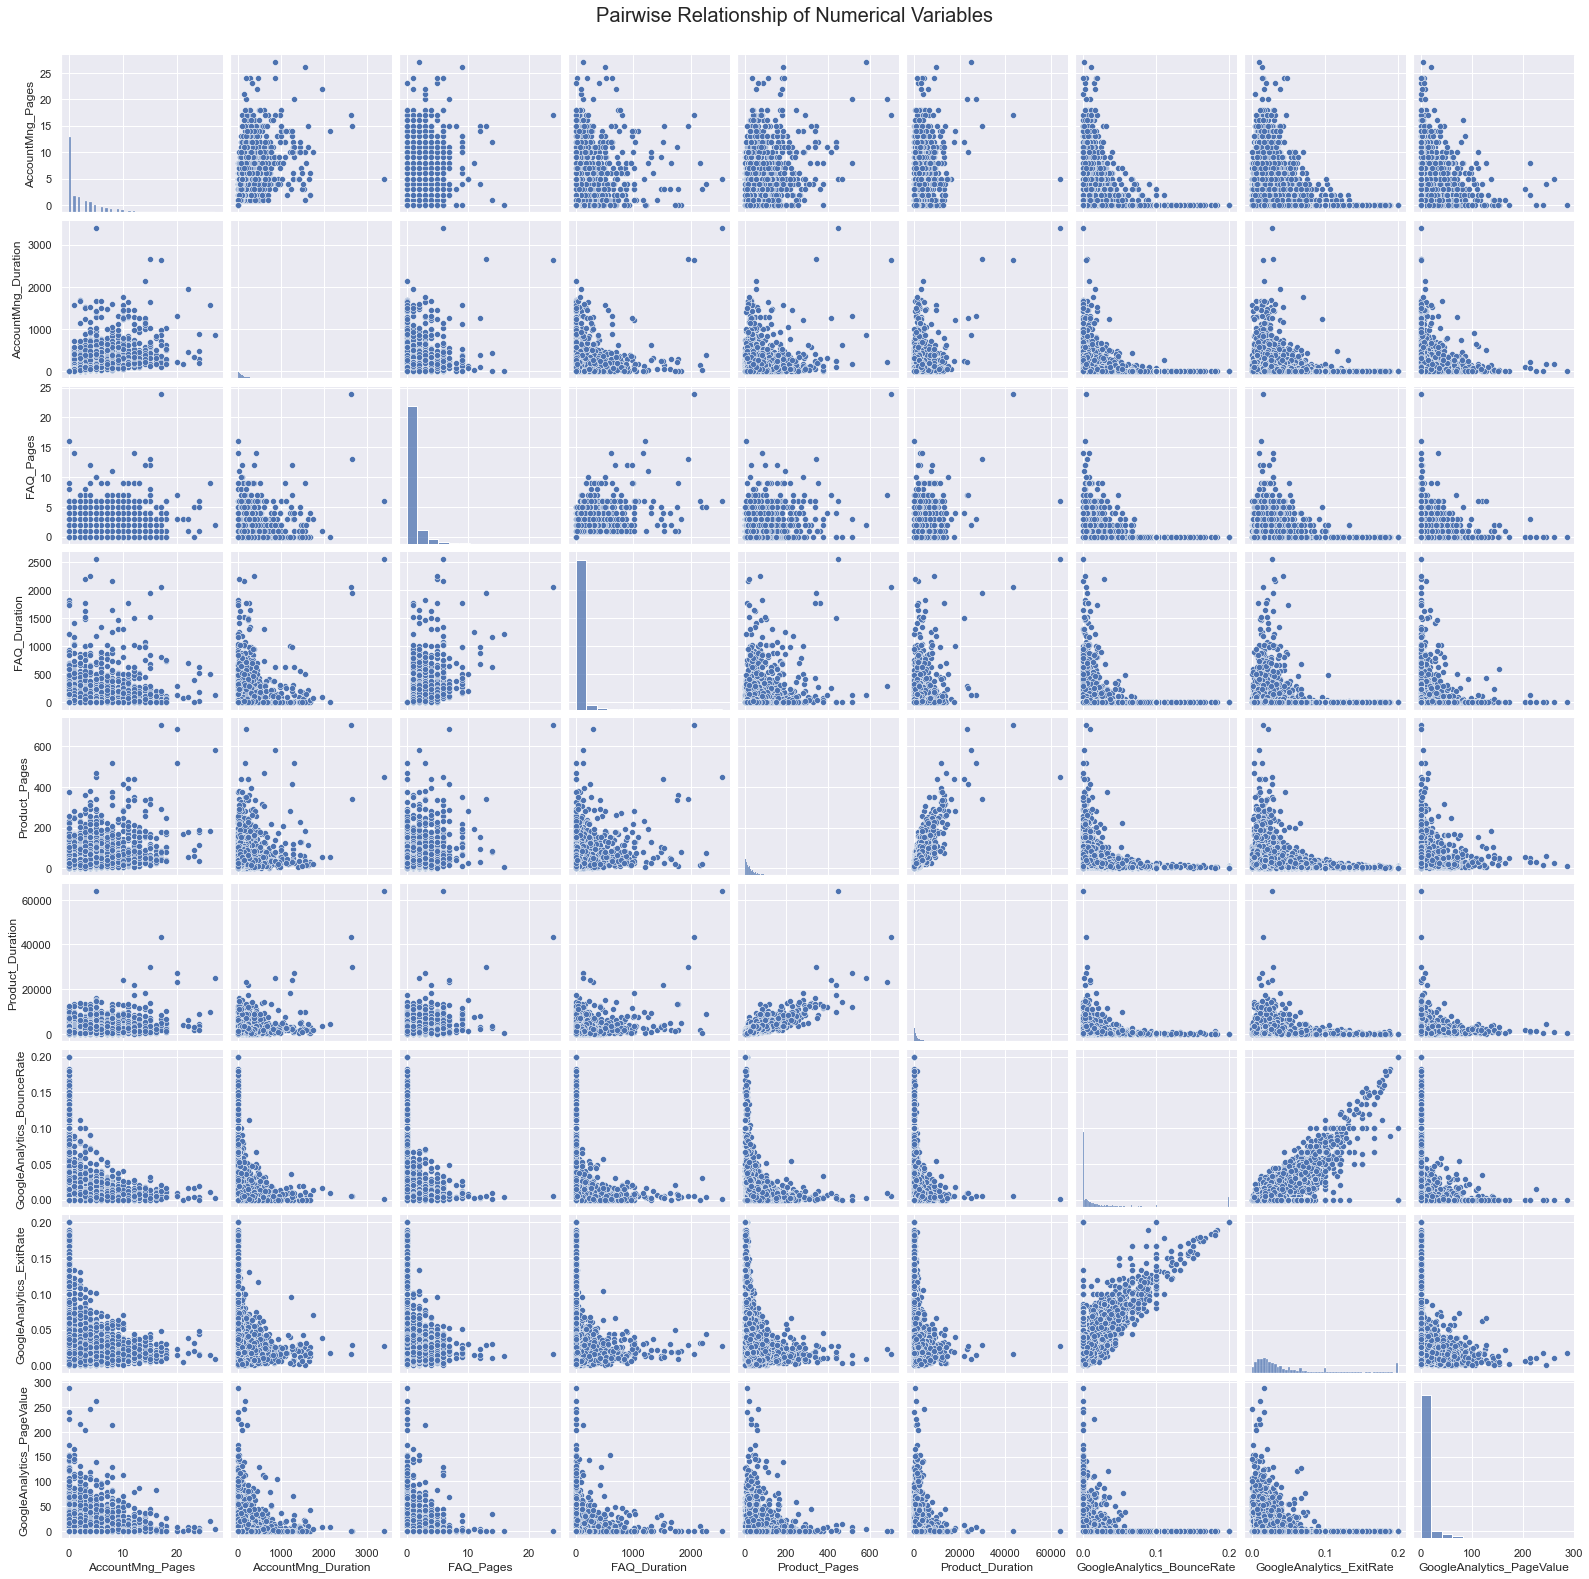

In [57]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(X_train[X_train_num.columns.tolist()], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

In [151]:
q25 = df.quantile(.25)
print(q25)
q75 = df.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive=True))
print(filters2)
filters2 = pd.Series(np.all(filters2, 0))
df_2 = df[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

AccountMng_Pages                     0.0
AccountMng_Duration                  0.0
FAQ_Pages                            0.0
FAQ_Duration                         0.0
Product_Pages                        7.0
Product_Duration              181.016678
GoogleAnalytics_BounceRate           0.0
GoogleAnalytics_ExitRate          0.0141
GoogleAnalytics_PageValue            0.0
Browser                              2.0
Type_of_Traffic                      2.0
Buy                                  0.0
day                                  8.0
Name: 0.25, dtype: Float64
[Access_ID
102863333    True
103117814    True
103201891    True
103226087    True
103234445    True
             ... 
798279589    True
798314158    True
798339820    True
798371242    True
798444008    True
Name: AccountMng_Pages, Length: 9710, dtype: boolean, Access_ID
102863333    True
103117814    True
103201891    True
103226087    True
103234445    True
             ... 
798279589    True
798314158    True
798339820    True
79837

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_13972/4171543322.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_13972/4171543322.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_13972/4171543322.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_13972/4171543322.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Lo

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [75]:
df_no_out = df[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_no_out.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9693


C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_14792/2221622883.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_out = df[(filters1 | filters2)]


In [193]:
def drop_outliers_IQR(data, iqr_mult,  metric_features):

    filters2 = []
    for metric in metric_features:
    
        q25 = data[metric].quantile(.25)
        q75 = data[metric].quantile(.75)
        iqr = (q75 - q25)
        upper_lim = q75 + iqr_mult * iqr
        lower_lim = q25 - iqr_mult * iqr
        print(upper_lim)
        print(lower_lim)
        filters2.append(data[metric].between(lower_lim, upper_lim, inclusive=True))
        
        print(filters2[filters2==False])
    
       
    
    df_2 = data[filters2]

   
    return df_2

In [194]:
drop_outliers_IQR(df,1,metric_features=['Product_Duration'])

2735.9442138671875
-1096.4470672607422
Access_ID
102863333    True
103117814    True
103201891    True
103226087    True
103234445    True
             ... 
798279589    True
798314158    True
798339820    True
798371242    True
798444008    True
Name: Product_Duration, Length: 9710, dtype: boolean


C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_14792/2098000812.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(data[metric].between(lower_lim, upper_lim, inclusive=True))


KeyError: "None of [Index([(True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, False, True, True, False, True, True, True, True, ...)], dtype='object')] are in the [columns]"

In [49]:
def drop_outliers(df, z_score, *args):
    """Drop statistical outliers from selected columns in selected dataframes with selected z-score as threshold. 

    Args:
        df (DataFrame): DataFrame to apply function to.
        z_score (int): Number of standard deviations away from the mean set as a threshold to drop outliers from.
        drop (bool): True allows for *columns to be columns to drop, whilst False allows *columns to be the only selected columns to use.
        *columns (str): Columns which need to be selected or dropped based on drop argument.

    Returns:
        [DataFrame: [description]
    """

    initial_length = len(df)

    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')) & (col in args):
            inital_length_col = len(df)
            df = df[~(np.abs(stats.zscore(df["FAQ_Pages"])) > z_score)]
            final_length_col = len(df)
            print("-------------------------------")
            print(f"Flitering: {col}\nDropped {inital_length_col-final_length_col} ({round(((inital_length_col-final_length_col)/inital_length_col)*100,2)}%) records")
        else:
            df[col]=df[col]

    final_length = len(df)
    print("-------------------------------")
    print("-------------------------------")
    print(f"Removed: {initial_length - final_length} ({round(((initial_length - final_length)/initial_length)*100,2)}%) records.\n ")

    return df

In [50]:
train_no_outliers = drop_outliers(df,3, "FAQ_Pages")

-------------------------------
-------------------------------
Removed: 0 (0.0%) records.
 


In [51]:
train_no_outliers[~(np.abs(stats.zscore(train_no_outliers["FAQ_Pages"])) > 5)]

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

### Feature Engineering

In [270]:
X_train_conc=pd.concat([X_train_no_out_num, X_train_no_out_cat],axis=1)

In [271]:
X_train_conc['month']=X_train_conc['Date'].dt.month

In [272]:
X_train_conc['avg_duration_account']=X_train_conc['AccountMng_Duration']-X_train_conc['AccountMng_Pages']

In [273]:
X_train_conc.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6270.0,2.466029,3.382658,0.0,0.000000,1.000000,4.000000,27.000000
AccountMng_Duration,6270.0,86.111404,175.930481,0.0,0.000000,17.424250,100.000000,2137.112793
FAQ_Pages,6270.0,0.536204,1.320252,0.0,0.000000,0.000000,0.000000,16.000000
FAQ_Duration,6270.0,37.608812,145.545944,0.0,0.000000,0.000000,0.000000,2256.916748
Product_Pages,6270.0,33.411005,43.966434,0.0,9.000000,20.000000,40.000000,584.000000
Product_Duration,6270.0,1261.920654,1824.881592,0.0,240.437531,671.965576,1534.822632,27009.859375
GoogleAnalytics_BounceRate,6270.0,0.011390,0.021509,0.0,0.000000,0.001900,0.013300,0.183300
GoogleAnalytics_ExitRate,6270.0,0.033059,0.029757,0.0,0.013300,0.023800,0.041700,0.188900
GoogleAnalytics_PageValue,6270.0,6.342981,18.502161,0.0,0.000000,0.000000,0.000000,287.953796
Type_of_Traffic,6270.0,3.901914,3.592070,1.0,2.000000,2.000000,4.000000,15.000000


In [274]:
X_train_conc['log_AccountMng_Duration']=np.log10(X_train['AccountMng_Duration']+1)
X_train_conc['log_AccountMng_Pages']=np.log10(X_train['AccountMng_Pages']+1)
X_train_conc['log_FAQ_Duration']=np.log10(X_train['FAQ_Duration']+1)
X_train_conc['log_FAQ_Pages']=np.log10(X_train['FAQ_Pages']+1)
X_train_conc['log_Product_Duration']=np.log10(X_train['Product_Duration']+1)
X_train_conc['log_Product_Pages']=np.log10(X_train['Product_Pages']+1)
X_train_conc['log_BounceRate']=np.log10(X_train['GoogleAnalytics_BounceRate']+1)
X_train_conc['log_ExitRate']=np.log10(X_train['GoogleAnalytics_ExitRate']+1)
X_train_conc['log_PageValue']=np.log10(X_train['GoogleAnalytics_PageValue']+1)

In [275]:
X_train_conc.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6270.0,2.466029,3.382658,0.0,0.000000,1.000000,4.000000,27.000000
AccountMng_Duration,6270.0,86.111404,175.930481,0.0,0.000000,17.424250,100.000000,2137.112793
FAQ_Pages,6270.0,0.536204,1.320252,0.0,0.000000,0.000000,0.000000,16.000000
FAQ_Duration,6270.0,37.608812,145.545944,0.0,0.000000,0.000000,0.000000,2256.916748
Product_Pages,6270.0,33.411005,43.966434,0.0,9.000000,20.000000,40.000000,584.000000
Product_Duration,6270.0,1261.920654,1824.881592,0.0,240.437531,671.965576,1534.822632,27009.859375
GoogleAnalytics_BounceRate,6270.0,0.011390,0.021509,0.0,0.000000,0.001900,0.013300,0.183300
GoogleAnalytics_ExitRate,6270.0,0.033059,0.029757,0.0,0.013300,0.023800,0.041700,0.188900
GoogleAnalytics_PageValue,6270.0,6.342981,18.502161,0.0,0.000000,0.000000,0.000000,287.953796
Type_of_Traffic,6270.0,3.901914,3.592070,1.0,2.000000,2.000000,4.000000,15.000000


In [276]:
X_train_conc_num = X_train_conc.drop(columns=non_num_feat)

In [279]:
X_train_conc.drop(columns[~non_num_feat]
df.drop(columns=['column_nameA', 'column_nameB'])


TypeError: bad operand type for unary ~: 'list'

### Scaling Data 

In [285]:
from sklearn.preprocessing import MinMaxScaler

X_train_num_scaled =  MinMaxScaler().fit_transform(X_train_conc.drop(columns=non_num_feat))

# Convert the array to a pandas dataframe
X_train_num_min = pd.DataFrame(X_train_num_scaled, columns = X_train_conc.drop(columns=non_num_feat).columns).set_index(X_train_conc.drop(columns=non_num_feat).index)
X_train_num_min.head(3)
X_train_num_min.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6270.0,0.091334,0.125284,0.0,0.000000,0.037037,0.148148,1.0
AccountMng_Duration,6270.0,0.040293,0.082322,0.0,0.000000,0.008153,0.046792,1.0
FAQ_Pages,6270.0,0.033513,0.082516,0.0,0.000000,0.000000,0.000000,1.0
FAQ_Duration,6270.0,0.016664,0.064489,0.0,0.000000,0.000000,0.000000,1.0
Product_Pages,6270.0,0.057211,0.075285,0.0,0.015411,0.034247,0.068493,1.0
Product_Duration,6270.0,0.046721,0.067564,0.0,0.008902,0.024879,0.056825,1.0
GoogleAnalytics_BounceRate,6270.0,0.062138,0.117345,0.0,0.000000,0.010366,0.072559,1.0
GoogleAnalytics_ExitRate,6270.0,0.175008,0.157530,0.0,0.070408,0.125993,0.220752,1.0
GoogleAnalytics_PageValue,6270.0,0.022028,0.064254,0.0,0.000000,0.000000,0.000000,1.0
month,6270.0,0.562153,0.337583,0.0,0.300000,0.500000,0.900000,1.0


In [289]:
X_train_min=pd.concat([X_train_num_min,X_train_conc[non_num_feat]],axis=1)

In [290]:
###### create the new variables in the validation set
scaler = MinMaxScaler().fit(X_train_no_out_num)
X_val_num_min = scaler.transform(X_val_no_out_num)
X_val_num_min = pd.DataFrame(X_val_num_scaled, columns = X_val_no_out_num.columns).set_index(X_val_no_out_num.index)
X_val_num_min.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue
Access_ID,,,,,,,,,
609666640,0.000000,0.000000,0.0000,0.000000,0.022260,0.019400,0.000000,0.088407,0.157887
598178285,0.000000,0.000000,0.0000,0.000000,0.015411,0.009052,0.000000,0.058761,0.000000
535781019,0.259259,0.036665,0.1875,0.093343,0.529110,0.450139,0.041462,0.134992,0.000000


In [159]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X_train_no_out_num)

X_train_num_robust= pd.DataFrame(transformer.fit_transform(X_train_no_out_num))
X_train_num_robust.columns=X_train_no_out_num.columns.values

In [160]:
X_val_num_robust= pd.DataFrame(transformer.fit_transform(X_val_no_out_num))


X_val_num_robust.columns=X_val_no_out_num.columns.values

In [161]:
X_train_num_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6270.0,0.366507,0.845665,-0.250000,-0.250000,0.0,0.750000,6.500000
AccountMng_Duration,6270.0,0.686872,1.759305,-0.174242,-0.174242,0.0,0.825758,21.196885
FAQ_Pages,6270.0,0.536204,1.320252,0.000000,0.000000,0.0,0.000000,16.000000
FAQ_Duration,6270.0,37.608812,145.545951,0.000000,0.000000,0.0,0.000000,2256.916748
Product_Pages,6270.0,0.432613,1.418272,-0.645161,-0.354839,0.0,0.645161,18.193548
Product_Duration,6270.0,0.455780,1.409844,-0.519139,-0.333385,0.0,0.666615,20.347804
GoogleAnalytics_BounceRate,6270.0,0.713525,1.617243,-0.142857,-0.142857,0.0,0.857143,13.639098
GoogleAnalytics_ExitRate,6270.0,0.326024,1.047794,-0.838028,-0.369718,0.0,0.630282,5.813380
GoogleAnalytics_PageValue,6270.0,6.342981,18.502161,0.000000,0.000000,0.0,0.000000,287.953796


### Feature Selection

In [291]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


In [226]:
X_train_conc_num=X_train_conc.drop(columns=non_num_feat)


In [305]:
def select_features(X_train, y_train):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    
    X_train_fs = pd.DataFrame(fs.transform(X_train))
    
    #X_test_fs = fs.transform(X_test)
    return X_train_fs, fs


In [307]:
select_features(X_train_num_min, y_train_df)

C:\Users\Utilizador\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(            0         1       2         3         4         5         6   \
 0     0.148148  0.036077  0.0000  0.000000  0.006849  0.001544  0.000000   
 1     0.000000  0.000000  0.2500  0.003545  0.113014  0.056085  0.124932   
 2     0.259259  0.061688  0.0000  0.000000  0.107877  0.076809  0.058920   
 3     0.000000  0.000000  0.0000  0.000000  0.003425  0.004480  0.000000   
 4     0.000000  0.000000  0.0000  0.000000  0.035959  0.037135  0.000000   
 ...        ...       ...     ...       ...       ...       ...       ...   
 6265  0.185185  0.051284  0.0625  0.001329  0.049658  0.073316  0.033279   
 6266  0.000000  0.000000  0.0000  0.000000  0.020548  0.006268  0.000000   
 6267  0.185185  0.045388  0.0000  0.000000  0.090753  0.124871  0.020731   
 6268  0.000000  0.000000  0.0000  0.000000  0.046233  0.039172  0.146754   
 6269  0.259259  0.073698  0.0625  0.010191  0.071918  0.129694  0.027823   
 
             7         8    9         10        11        12        13  \


In [308]:
X_train_num_min

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,month,avg_duration_account,log_AccountMng_Duration,log_AccountMng_Pages,log_FAQ_Duration,log_FAQ_Pages,log_Product_Duration,log_Product_Pages,log_BounceRate,log_ExitRate,log_PageValue
Access_ID,,,,,,,,,,,,,,,,,,,,
746917175,0.148148,0.036077,0.0000,0.000000,0.006849,0.001544,0.000000,0.151403,0.000000,0.7,0.034431,0.568358,0.482995,0.000000,0.000000,0.367915,0.252595,0.000000,0.162971,0.000000
565616559,0.000000,0.000000,0.2500,0.003545,0.113014,0.056085,0.124932,0.237692,0.000000,1.0,0.000000,0.000000,0.000000,0.284534,0.568061,0.717731,0.659910,0.134526,0.253838,0.000000
276412217,0.259259,0.061688,0.0000,0.000000,0.107877,0.076809,0.058920,0.105876,0.000000,1.0,0.058797,0.637624,0.624044,0.000000,0.000000,0.748531,0.652721,0.063824,0.114447,0.000000
361837847,0.000000,0.000000,0.0000,0.000000,0.003425,0.004480,0.000000,0.264690,0.000000,0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.470798,0.172423,0.000000,0.281977,0.000000
568629484,0.000000,0.000000,0.0000,0.000000,0.035959,0.037135,0.000000,0.043939,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.677357,0.485127,0.000000,0.047771,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789752052,0.185185,0.051284,0.0625,0.001329,0.049658,0.073316,0.033279,0.139227,0.000000,0.5,0.049267,0.613735,0.537710,0.179521,0.244651,0.743973,0.533805,0.036134,0.150033,0.000000
581081929,0.000000,0.000000,0.0000,0.000000,0.020548,0.006268,0.000000,0.088407,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.503485,0.402559,0.000000,0.095719,0.000000
283517225,0.185185,0.045388,0.0000,0.000000,0.090753,0.124871,0.020731,0.013235,0.000000,1.0,0.043333,0.597960,0.537710,0.000000,0.000000,0.796137,0.626056,0.022535,0.014431,0.000000


In [323]:
X_train_fs, fs =select_features(X_train_num_min, y_train_df)
dict_feat={}

for i in range(len(fs.scores_)):
    dict_feat[X_train_num_min.columns[i]]=fs.scores_[i]
    
dict(sorted(dict_feat.items(), key=lambda item: item[1]))
 

C:\Users\Utilizador\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'FAQ_Duration': 32.48739879551778,
 'FAQ_Pages': 46.28403258383279,
 'avg_duration_account': 47.33447732972854,
 'AccountMng_Duration': 48.91904698992662,
 'log_FAQ_Pages': 59.1825762855989,
 'log_FAQ_Duration': 68.20924850461424,
 'month': 94.71225241300864,
 'AccountMng_Pages': 102.88509066233165,
 'GoogleAnalytics_BounceRate': 125.94275502840989,
 'Product_Pages': 127.43090258536755,
 'log_BounceRate': 128.5518876681903,
 'Product_Duration': 135.62955798841787,
 'log_AccountMng_Pages': 136.34327733804022,
 'log_AccountMng_Duration': 144.5484213189944,
 'log_Product_Pages': 186.969957272441,
 'log_Product_Duration': 211.60312078810588,
 'GoogleAnalytics_ExitRate': 290.4885798461553,
 'log_ExitRate': 297.1279882281061,
 'GoogleAnalytics_PageValue': 2045.207047956855,
 'log_PageValue': 3944.7086299230036}

In [ ]:
spearman correlations - filipa
forward(setwise) selection --helena
rfe -- leonardo
decision tree -leonor
ridge - daniel